In [322]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [323]:
new_portfolio_tickers = ['aapl','btc','eth-usd','lit','tsla','usdt-usd']
old_portfolio_tickers = ['dis','ko','cba','brk-b','jnj','gld']

In [324]:
new_stock_data = yf.download(new_portfolio_tickers, start = "2020-07-03",ed = "2022-07-01")
old_stock_data = yf.download(old_portfolio_tickers, start = "2020-07-03",ed = "2022-07-01")

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


In [325]:
new_stock_data

Adj Close                                                 \
                  AAPL        BTC      ETH-USD        LIT        TSLA   
Date                                                                    
2020-07-02   89.904602        NaN   229.392197  32.222633  241.731995   
2020-07-03         NaN        NaN   225.387070        NaN         NaN   
2020-07-04         NaN        NaN   229.074112        NaN         NaN   
2020-07-05         NaN        NaN   227.664597        NaN         NaN   
2020-07-06   92.309578        NaN   241.510223  34.751072  274.316010   
...                ...        ...          ...        ...         ...   
2022-07-01  138.929993  93.425003  1059.767334  71.750000  681.789978   
2022-07-02         NaN        NaN  1066.512817        NaN         NaN   
2022-07-03         NaN        NaN  1073.766968        NaN         NaN   
2022-07-04         NaN        NaN  1151.059082        NaN         NaN   
2022-07-05         NaN        NaN  1131.054443        NaN         NaN   

                           Close                                     ...  \
            USDT-USD        AAPL        BTC      ETH-USD        LIT  ...   
Date                                                                 ...   
2020-07-02  1.015718   91.027496        NaN   229.392197  32.369999  ...   
2020-07-03  0.999521         NaN        NaN   225.387070        NaN  ...   
2020-07-04  1.001078         NaN        NaN   229.074112        NaN  ...   
2020-07-05  0.998899         NaN        NaN   227.664597        NaN  ...   
2020-07-06  1.000236   93.462502        NaN   241.510223  34.910000  ...   
...              ...         ...        ...          ...        ...  ...   
2022-07-01  0.998867  138.929993  93.425003  1059.767334  71.750000  ...   
2022-07-02  0.998960         NaN        NaN  1066.512817        NaN  ...   
2022-07-03  0.999078         NaN        NaN  1073.766968        NaN  ...   
2022-07-04  0.999109         NaN        NaN  1151.059082        NaN  ...   
2022-07-05  0.999087         NaN        NaN  1131.054443        NaN  ...   

                   Open                                        Volume        \
                ETH-USD        LIT        TSLA  USDT-USD         AAPL   BTC   
Date                                                                          
2020-07-02   231.288910  32.419998  244.296005  1.000955  114041600.0   NaN   
2020-07-03   229.318954        NaN         NaN  1.015713          NaN   NaN   
2020-07-04   225.288483        NaN         NaN  0.999756          NaN   NaN   
2020-07-05   228.976196        NaN         NaN  1.000234          NaN   NaN   
2020-07-06   227.685013  34.110001  255.337997  0.998376  118655600.0   NaN   
...                 ...        ...         ...       ...          ...   ...   
2022-07-01  1068.316772  71.500000  681.000000  0.998860   71007500.0  84.0   
2022-07-02  1060.121216        NaN         NaN  0.998855          NaN   NaN   
2022-07-03  1066.467407        NaN         NaN  0.998953          NaN   NaN   
2022-07-04  1073.794312        NaN         NaN  0.999071          NaN   NaN   
2022-07-05  1149.005371        NaN         NaN  0.999107          NaN   NaN   

                                                             
                ETH-USD       LIT         TSLA     USDT-USD  
Date                                                         
2020-07-02   6212210566  362100.0   86250500.0  21713824216  
2020-07-03   5109032700       NaN          NaN  17207532375  
2020-07-04   5228310135       NaN          NaN  16834529314  
2020-07-05   5292172429       NaN          NaN  18453609716  
2020-07-06   8782917553  587400.0  102849500.0  28513816011  
...                 ...       ...          ...          ...  
2022-07-01  17499453625  733900.0   24781500.0  49683415220  
2022-07-02   9935603640       NaN          NaN  31666712588  
2022-07-03   8557248150       NaN          NaN  27890770459  
2022-07-04  13670889311       NaN          NaN  37816157114  
2022-07-05  

In [326]:
old_stock_data

Adj Close                                                       \
                 BRK-B   CBA         DIS         GLD         JNJ         KO   
Date                                                                          
2020-07-02  178.830002  0.16  112.180000  166.979996  133.927063  42.193058   
2020-07-06  182.720001  0.16  114.430000  167.979996  135.836609  42.522102   
2020-07-07  181.149994  0.17  113.629997  169.039993  135.713150  42.503307   
2020-07-08  181.199997  0.17  116.660004  170.089996  136.112152  42.371681   
2020-07-09  178.800003  0.19  116.809998  169.630005  135.371109  41.281128   
...                ...   ...         ...         ...         ...        ...   
2022-06-27  278.399994  0.20   96.610001  169.899994  182.119995  62.910000   
2022-06-28  273.859985  0.20   95.919998  169.619995  176.940002  62.279999   
2022-06-29  273.489990  0.20   95.650002  169.490005  176.990005  62.730000   
2022-06-30  273.019989  0.20   94.400002  168.460007  177.509995  62.910000   
2022-07-01  277.500000   NaN   96.139999  168.320007  179.520004  64.379997   

                 Close                                ...        Open  \
                 BRK-B   CBA         DIS         GLD  ...         DIS   
Date                                                  ...               
2020-07-02  178.830002  0.16  112.180000  166.979996  ...  115.000000   
2020-07-06  182.720001  0.16  114.430000  167.979996  ...  113.830002   
2020-07-07  181.149994  0.17  113.629997  169.039993  ...  113.629997   
2020-07-08  181.199997  0.17  116.660004  170.089996  ...  113.480003   
2020-07-09  178.800003  0.19  116.809998  169.630005  ...  116.510002   
...                ...   ...         ...         ...  ...         ...   
2022-06-27  278.399994  0.20   96.610001  169.899994  ...   98.220001   
2022-06-28  273.859985  0.20   95.919998  169.619995  ...   99.739998   
2022-06-29  273.489990  0.20   95.650002  169.490005  ...   95.949997   
2022-06-30  273.019989  0.20   94.400002  168.460007  ...   94.419998   
2022-07-01  277.500000   NaN   96.139999  168.320007  ...   94.239998   

                                                Volume                     \
                   GLD         JNJ         KO    BRK-B      CBA       DIS   
Date                                                                        
2020-07-02  166.199997  141.250000  45.290001  5163100   6000.0  10312000   
2020-07-06  167.750000  142.169998  45.139999  6443300   5900.0  11933400   
2020-07-07  167.410004  141.389999  45.000000  4952100   1700.0  10836500   
2020-07-08  170.320007  142.869995  45.139999  5547800  74400.0  13629500   
2020-07-09  170.479996  142.759995  45.049999  5420600  40000.0  13582900   
...                ...         ...        ...      ...      ...       ...   
2022-06-27  170.600006  181.639999  62.980000  4134800      0.0  10793700   
2022-06-28  170.070007  182.169998  63.080002  3868000      0.0  16812400   
2022-06-29  170.580002  177.220001  62.540001  2995900      0.0   8653200   
2022-06-30  169.509995  176.860001  62.320000  4623500      0.0  10983500   
2022-07-01  167.139999  177.449997  63.119999  3667300      NaN  10536400   

                                          
                 GLD       JNJ        KO  
Date                                      
2020-07-02   8753500   5152200  15111900  
2020-07-06   7265700   6156400  15146000  
2020-07-07  11633100   5622600  13043600  
2020-07-08  11662700   6257400  13851200  
2020-07-09  13327400   5738600  16087100  
...              ...       ...       ...  
2022-06-27   5719700   5908600  12142100  
2022-06-28   2982700   9245700  13150100  
2022-06-29   4785600   7097900  11795500  
2022-06-30   9144400  10777200  15514200  
2022-07-01  11379500   5496900  15140100  

[504 rows x 36 columns]

In [327]:
new_stock_data.head()

Adj Close                                                   \
                 AAPL BTC     ETH-USD        LIT        TSLA  USDT-USD   
Date                                                                     
2020-07-02  89.904602 NaN  229.392197  32.222633  241.731995  1.015718   
2020-07-03        NaN NaN  225.387070        NaN         NaN  0.999521   
2020-07-04        NaN NaN  229.074112        NaN         NaN  1.001078   
2020-07-05        NaN NaN  227.664597        NaN         NaN  0.998899   
2020-07-06  92.309578 NaN  241.510223  34.751072  274.316010  1.000236   

                Close                             ...        Open             \
                 AAPL BTC     ETH-USD        LIT  ...     ETH-USD        LIT   
Date                                              ...                          
2020-07-02  91.027496 NaN  229.392197  32.369999  ...  231.288910  32.419998   
2020-07-03        NaN NaN  225.387070        NaN  ...  229.318954        NaN   
2020-07-04        NaN NaN  229.074112        NaN  ...  225.288483        NaN   
2020-07-05        NaN NaN  227.664597        NaN  ...  228.976196        NaN   
2020-07-06  93.462502 NaN  241.510223  34.910000  ...  227.685013  34.110001   

                                       Volume                            \
                  TSLA  USDT-USD         AAPL BTC     ETH-USD       LIT   
Date                                                                      
2020-07-02  244.296005  1.000955  114041600.0 NaN  6212210566  362100.0   
2020-07-03         NaN  1.015713          NaN NaN  5109032700       NaN   
2020-07-04         NaN  0.999756          NaN NaN  5228310135       NaN   
2020-07-05         NaN  1.000234          NaN NaN  5292172429       NaN   
2020-07-06  255.337997  0.998376  118655600.0 NaN  8782917553  587400.0   

                                      
                   TSLA     USDT-USD  
Date                                  
2020-07-02   86250500.0  21713824216  
2020-07-03          NaN  17207532375  
2020-07-04          NaN  16834529314  
2020-07-05          NaN  18453609716  
2020-07-06  102849500.0  28513816011  

[5 rows x 36 columns]

In [328]:
new_stock_data = new_stock_data['Close'].pct_change()

new_weights = [.1667,.1667,.1667,.1667,.1667,.1667]

new_returns = new_stock_data.dot(new_weights)

In [329]:
new_returns.tail()

Date
2022-07-01    0.002583
2022-07-02    0.001077
2022-07-03    0.001154
2022-07-04    0.012005
2022-07-05   -0.002901
Freq: D, dtype: float64

In [330]:
df_new_portfolio = pd.DataFrame(new_returns) 
df_new_portfolio.head()

,0
Date,
2020-07-02,NaN
2020-07-03,NaN
2020-07-04,NaN
2020-07-05,NaN
2020-07-06,NaN


In [331]:
df_new_portfolio.rename(columns = {0:'New Portfolio Percentage Change'}, inplace = True)

In [332]:
df_new_portfolio

,New Portfolio Percentage Change
Date,
2020-07-02,NaN
2020-07-03,NaN
2020-07-04,NaN
2020-07-05,NaN
2020-07-06,NaN
...,...
2022-07-01,0.002583
2022-07-02,0.001077
2022-07-03,0.001154


In [333]:
old_stock_data = old_stock_data['Close'].pct_change()

old_weights = [.1667,.1667,.1667,.1667,.1667,.1667]

old_returns = old_stock_data.dot(old_weights)

In [334]:
old_returns

Date
2020-07-02         NaN
2020-07-06    0.011645
2020-07-07    0.008648
2020-07-08    0.005501
2020-07-09    0.011969
                ...   
2022-06-27   -0.002608
2022-06-28   -0.010595
2022-06-29    0.000429
2022-06-30   -0.002510
2022-07-01    0.011452
Length: 504, dtype: float64

In [335]:
df_old_portfolio = pd.DataFrame(old_returns) 
df_old_portfolio.head()

,0
Date,
2020-07-02,NaN
2020-07-06,0.011645
2020-07-07,0.008648
2020-07-08,0.005501
2020-07-09,0.011969


In [336]:
df_old_portfolio.rename(columns = {0:'Old Portfolio Percentage Change'}, inplace = True)

In [337]:
df_old_portfolio

,Old Portfolio Percentage Change
Date,
2020-07-02,NaN
2020-07-06,0.011645
2020-07-07,0.008648
2020-07-08,0.005501
2020-07-09,0.011969
...,...
2022-06-27,-0.002608
2022-06-28,-0.010595
2022-06-29,0.000429


<AxesSubplot:xlabel='Date'>

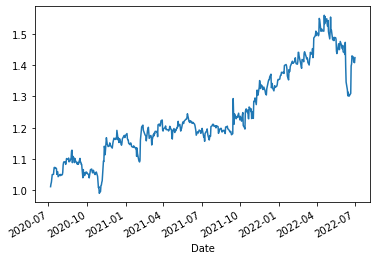

In [338]:
old_cumulative_returns = (1 + old_returns).cumprod()
old_cumulative_returns.plot()

In [339]:
#df_old_portfolio["Old Cummulative Returns"]=old_cumulative_returns
#df_old_portfolio.head()

<AxesSubplot:xlabel='Date'>

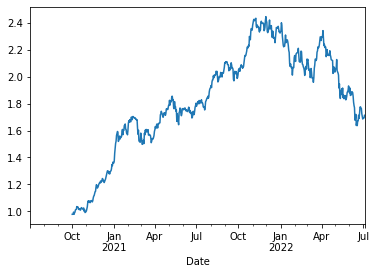

In [340]:
new_cumulative_returns = (1 + new_returns).cumprod()
new_cumulative_returns.plot()

In [341]:
df_old_portfolio_cummulative_returns = pd.DataFrame(old_cumulative_returns) 
df_old_portfolio_cummulative_returns.head()

,0
Date,
2020-07-02,NaN
2020-07-06,1.011645
2020-07-07,1.020393
2020-07-08,1.026006
2020-07-09,1.038286


In [342]:
df_old_portfolio_cummulative_returns.rename(columns = {0:'Old Portfolio Cummulative Returns'}, inplace = True)

In [343]:
df_new_portfolio_cummulative_returns = pd.DataFrame(new_cumulative_returns) 
df_new_portfolio_cummulative_returns.head()

,0
Date,
2020-07-02,NaN
2020-07-03,NaN
2020-07-04,NaN
2020-07-05,NaN
2020-07-06,NaN


In [344]:
df_new_portfolio_cummulative_returns.rename(columns = {0:'New Portfolio Cummulative Returns'}, inplace = True)

In [345]:
#df_new_portfolio["New Cummulative Returns"]=new_cumulative_returns
#df_new_portfolio.head()

In [346]:
group_portfolio_data = pd.concat([df_new_portfolio,df_old_portfolio], axis="columns", join="inner")
group_portfolio_data.tail()

,New Portfolio Percentage Change,Old Portfolio Percentage Change
Date,,
2022-06-27,-0.000794,-0.002608
2022-06-28,-0.022492,-0.010595
2022-06-29,-0.013005,0.000429
2022-06-30,-0.009974,-0.002510
2022-07-01,0.002583,0.011452


In [347]:
group_portfolio_data.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [348]:
group_portfolio_cummulative_returns = pd.concat([df_new_portfolio_cummulative_returns,df_old_portfolio_cummulative_returns], axis="columns", join="inner")
group_portfolio_cummulative_returns.tail()

,New Portfolio Cummulative Returns,Old Portfolio Cummulative Returns
Date,,
2022-06-27,1.765115,1.425665
2022-06-28,1.725415,1.410561
2022-06-29,1.702976,1.411166
2022-06-30,1.685991,1.407624
2022-07-01,1.690346,1.423745


In [349]:
group_portfolio_cummulative_returns.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)